In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Read in our data
data_url='https://drive.google.com/file/d/1LAabXMqBNd7m4FM4gNFFwxFij-HvmrhI/view?usp=sharing'
file_id=data_url.split('/')[-2]
data_url='https://drive.google.com/uc?id=' + file_id

# Get to know the data a bit
experiment_data = pd.read_csv(data_url)
experiment_data.info()
experiment_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


'ad' is a group exposed to ads (the experimental group) and 'psa' is a portion of people (the control group) who would instead see a Public Service Announcement (PSA) (or nothing). Let's split the data based on this variable for ease of analysis.

In [2]:


experiment_data_ads = experiment_data[experiment_data['test group']=='ad']
print(experiment_data_ads['total ads'].describe())

converted_yes = experiment_data_ads[experiment_data_ads['converted']==True]

converted_no = experiment_data_ads[experiment_data_ads['converted']==False]


print(converted_yes['total ads'].describe())
print(converted_no['total ads'].describe())


count    564577.000000
mean         24.823365
std          43.750456
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64
count    14423.000000
mean        83.905567
std         87.504179
min          1.000000
25%         35.000000
50%         64.000000
75%        103.000000
max       1778.000000
Name: total ads, dtype: float64
count    550154.000000
mean         23.274449
std          40.861306
min           1.000000
25%           4.000000
50%          13.000000
75%          26.000000
max        2065.000000
Name: total ads, dtype: float64


# 1. Do people who converted have **seen** a bigger number of ads on average than people who are not converted?

let's check whether the samples are normally distributed. We'll do that both visually and through descriptive statistics.

Using matplotlib.pyplot we can plot histograms of each sample. By setting alpha = .5, the transparency of each histogram is reduced so we can more easily make out overlapping areas.

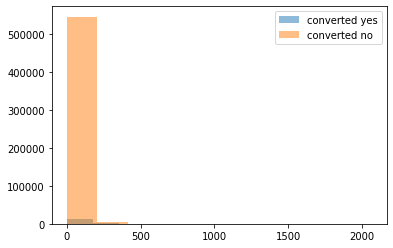

In [3]:

plt.hist(converted_yes['total ads'], alpha = .5, label = "converted yes")
plt.hist(converted_no['total ads'], alpha = .5, label = "converted no")

plt.legend(loc="upper right")
plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20ae3d3c50>,
      dtype=object)

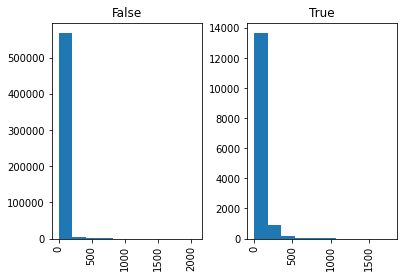

In [4]:
experiment_data['total ads'].hist(by = experiment_data['converted'])


The histogram has plotted some values of low values. This is a small selection of the data, so we are safe simply dropping it and proceeding with the analysis.

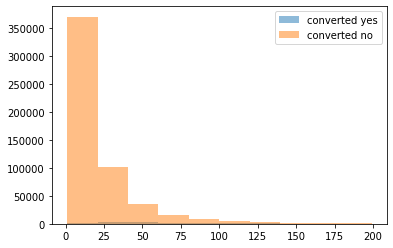

In [5]:
experiment_data_ads_filtered = experiment_data_ads[experiment_data_ads['total ads']<200]
converted_yes = experiment_data_ads_filtered[experiment_data_ads_filtered['converted']==True]
converted_no = experiment_data_ads_filtered[experiment_data_ads_filtered['converted']==False]
plt.hist(converted_yes['total ads'], alpha = .5, label = "converted yes")
plt.hist(converted_no['total ads'], alpha = .5, label = "converted no")

plt.legend(loc="upper right")
plt.show()

We can create a series of histograms for each category by adding the by argument to hist().

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20ae28e590>,
      dtype=object)

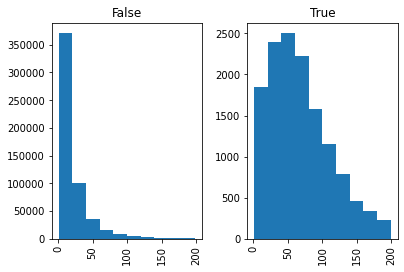

In [6]:
experiment_data_ads_filtered['total ads'].hist(by = experiment_data_ads_filtered['converted'])

It appears from the histograms that this data does not fit a bell curve. 

To confirm, let's also retrieve the  exact measures of skewness and kurtosis. We will do that with `describe()` from [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html).**bold text**

In [7]:
print(stats.describe(converted_yes['total ads']))
print(stats.describe(converted_no['total ads']))

DescribeResult(nobs=13529, minmax=(1, 199), mean=67.51297213393451, variance=1910.427112166654, skewness=0.7237845825737649, kurtosis=0.0002569093614961382)
DescribeResult(nobs=545308, minmax=(1, 199), mean=20.6210490218372, variance=695.8427980479206, skewness=2.833405299782117, kurtosis=10.319170001541229)


From both the histograms and the statistics, it appears that the samples of this variable are not normally distributed.




In [8]:
# Because not normally distributed
# let's continue our analysis using Kruskal-Wallis
stats.kruskal(converted_yes['total ads'], converted_no['total ads'])

KruskalResult(statistic=19861.50899384467, pvalue=0.0)

Based on the p-value, we can see that there is signicant difference between two groups means.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


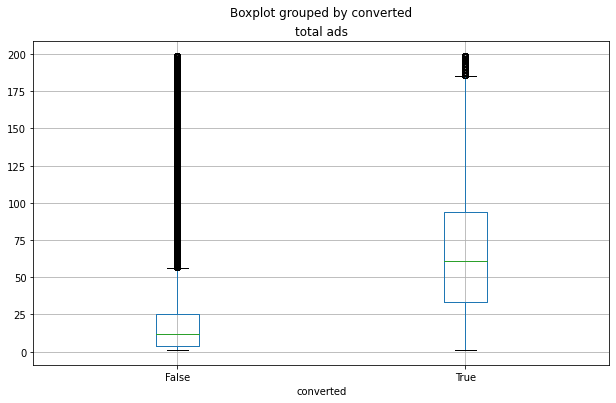

In [9]:
# Let's visualize through boxplot for further info

experiment_data_ads_filtered.boxplot('total ads', by='converted', figsize=(10, 6))

From the boxplot, it looks like people who are converted have seen more ads than who aren't.

[[Text(0, 0, 'converted_yes'), Text(0, 0, 'converted_no')]]

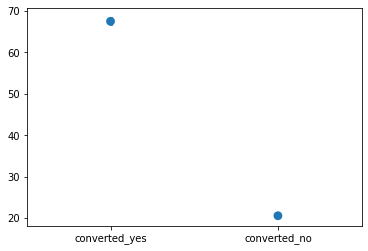

In [10]:
#  we can also create a pointplot to compare the means. 
import seaborn as sns

g = sns.pointplot(data=[converted_yes['total ads'],
                        converted_no['total ads']], join=False)
                        
g.set(xticklabels = ['converted_yes', 'converted_no'])

In [11]:
import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(converted_yes['total ads'], converted_no['total ads'])

'The difference in means at the 95% confidence interval (two-tail) is between -47.6317701110782 and -46.15207611311642.'

We can interpret this result as saying that with 95% confidence, people who have not converted  have seen ads on average between 57.95 and 55.73 lesser than people who have converted.

From the above statistics, confidence interval, boxplot visualization, it looks like people who converted have seen a bigger number of ads on average than people who are not converted. Hence, we can say that people's conversion somewhat rely on number of ads seen.

# 2. Is there a significant difference in the number of ads seen on average from Monday to Friday? If yes, Which day do people see the biggest number of ads?


In [12]:
experiment_data_ads_filtered['most ads day'].unique()

array(['Monday', 'Tuesday', 'Sunday', 'Wednesday', 'Friday', 'Saturday',
       'Thursday'], dtype=object)

let's check whether the samples are normally distributed. We'll do that both visually and through descriptive statistics.

DescribeResult(nobs=82568, minmax=(1, 199), mean=21.677247844201144, variance=797.2579599331467, skewness=2.709427351585443, kurtosis=8.875893759579862)
DescribeResult(nobs=73988, minmax=(1, 199), mean=21.659890793101585, variance=753.4205940491927, skewness=2.68643204688334, kurtosis=9.049542527274506)
DescribeResult(nobs=76609, minmax=(1, 199), mean=21.359657481496953, variance=784.3534533914514, skewness=2.6812349581340396, kurtosis=8.89129953449247)
DescribeResult(nobs=78314, minmax=(1, 199), mean=20.391539188395434, variance=715.0229110603121, skewness=2.8448690722773287, kurtosis=10.270142582673012)
DescribeResult(nobs=87610, minmax=(1, 199), mean=22.51167674922954, variance=848.0034078083937, skewness=2.6870576720599217, kurtosis=8.69065573173829)
DescribeResult(nobs=78088, minmax=(1, 199), mean=22.4820971211966, variance=771.208433820936, skewness=2.6617350193972884, kurtosis=8.918926401844637)
DescribeResult(nobs=81660, minmax=(1, 199), mean=22.09982855743326, variance=757.938

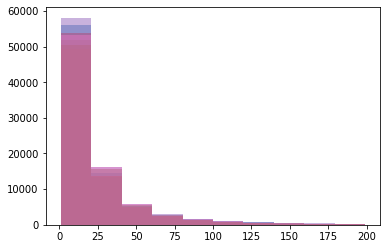

In [13]:
ads_monday = experiment_data_ads_filtered[experiment_data_ads_filtered['most ads day'] == 'Monday']
ads_tuesday = experiment_data_ads_filtered[experiment_data_ads_filtered['most ads day'] == 'Tuesday']
ads_wednesday = experiment_data_ads_filtered[experiment_data_ads_filtered['most ads day'] == 'Wednesday']
ads_thursday = experiment_data_ads_filtered[experiment_data_ads_filtered['most ads day'] == 'Thursday']
ads_friday = experiment_data_ads_filtered[experiment_data_ads_filtered['most ads day'] == 'Friday']
ads_saturday = experiment_data_ads_filtered[experiment_data_ads_filtered['most ads day'] == 'Saturday']
ads_sunday = experiment_data_ads_filtered[experiment_data_ads_filtered['most ads day'] == 'Sunday']

print(stats.describe(ads_monday['total ads']))
print(stats.describe(ads_tuesday['total ads']))
print(stats.describe(ads_wednesday['total ads']))
print(stats.describe(ads_thursday['total ads']))
print(stats.describe(ads_friday['total ads']))
print(stats.describe(ads_saturday['total ads']))
print(stats.describe(ads_sunday['total ads']))

plt.hist(ads_monday['total ads'], alpha = .5)
plt.hist(ads_tuesday['total ads'], alpha = .5)
plt.hist(ads_wednesday['total ads'], alpha = .5)
plt.hist(ads_thursday['total ads'], alpha = .5)
plt.hist(ads_friday['total ads'], alpha = .5)
plt.hist(ads_saturday['total ads'], alpha = .5)
plt.hist(ads_sunday['total ads'], alpha = .5)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20ae0ba8d0>,
      dtype=object)

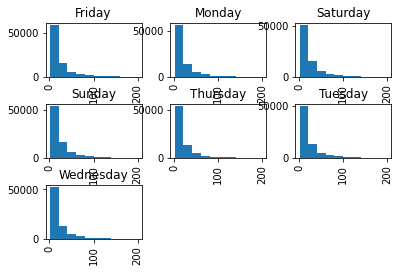

In [14]:
experiment_data_ads_filtered['total ads'].hist(by =experiment_data_ads_filtered['most ads day'])


From both the histograms and the statistics, it appears that the samples of this variable are not normally distributed.

In [15]:
# Because not normally distributed
# let's continue our analysis using Kruskal-Wallis
stats.kruskal(ads_monday['total ads'], ads_tuesday['total ads'], ads_wednesday['total ads'], ads_thursday['total ads'], ads_friday['total ads'], ads_saturday['total ads'], ads_sunday['total ads'])

KruskalResult(statistic=740.1522108886498, pvalue=1.3058360663854145e-156)

Based on the p-value, we can see that there is signicant difference between groups means.



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


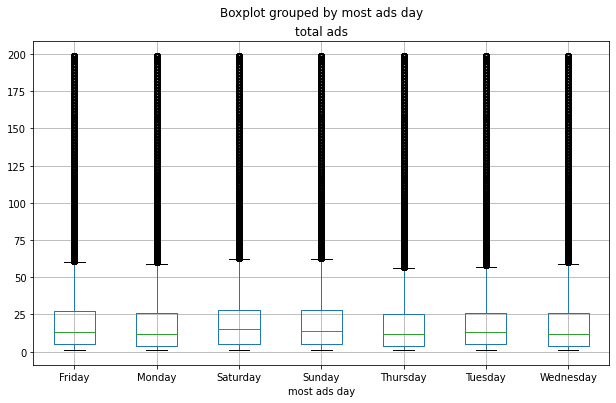

In [16]:
# Let's visualize through boxplot for further info
experiment_data_ads_filtered.boxplot('total ads', by='most ads day', figsize=(10, 6))

From the above plot, it looks like there is a no difference in total ads  seen every day

# Conclusion

From the above analisys, I see that:
1. Ads shown contributes to Conversion.
2. People watch the same number of ads each day and hence the conversions are not attributed to any single day.

The above proposal benefits the company who ran A/B test to find key insights regarding impact of ads on conversions. With the above proposal, the company can understand whether the people are buying their products mostly because of their ads. Also, it helps them to know that the conversions are not dependent on specific day ad is seen. This understanding will help companies who run the similar campaign driving future business decisions.

